In [539]:
path=r"D:\Asus\Documents\https___specials-images.forbesimg.com_imageserve_5e4c3a60f133f40006292834_Volvo-VNR-Electric-Side-Profile_960x0.jpg_fit=scale"

In [540]:
import numpy as np, matplotlib.pyplot as plt, matplotlib.image as img_, cv2

In [541]:
img=img_.imread(path)

In [542]:
img1=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

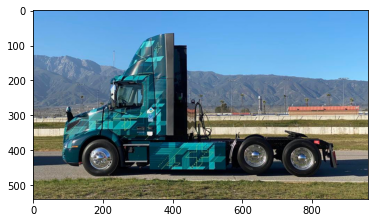

In [543]:
plt.imshow(img)

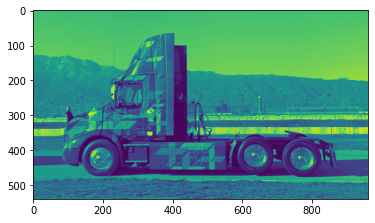

In [544]:
plt.imshow(img1)

### Automating the process with template matching

In [547]:
template_= img1[300:400,80:440]

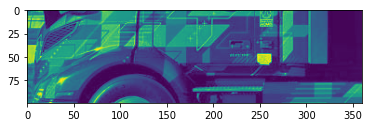

In [548]:
plt.imshow(template_)

In [549]:
result=cv2.matchTemplate(img1, template_,cv2.TM_CCOEFF_NORMED)

In [550]:
result.shape

(441, 601)

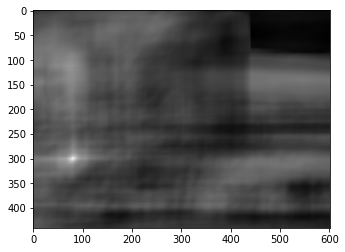

In [551]:
plt.imshow(result,cmap="gray")

In [552]:
cv2.minMaxLoc(result)

(-0.36866068840026855, 0.9999995827674866, (442, 49), (80, 300))

In [553]:
left=cv2.minMaxLoc(result)[3]

In [554]:
left

(80, 300)

In [555]:
w,h= template_.shape

In [556]:
w

100

In [557]:
h

360

In [558]:
right=(left[0]+h,left[1]+w)

In [559]:



right

(440, 400)

### Identifying the block now

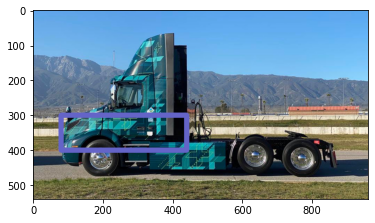

In [563]:
plt.imshow(cv2.rectangle(img, left, right, (100,100,200),13),cmap="gray")

In [564]:
harris= cv2.cornerHarris(img1,7,11,0.1)

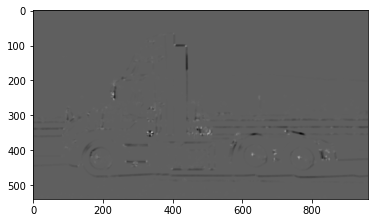

In [565]:
plt.imshow(harris,cmap="gray")

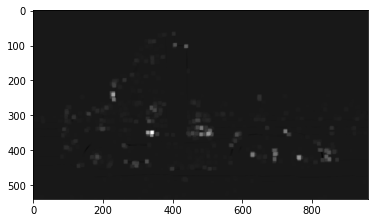

In [574]:

corners_dilate = cv2.dilate(harris, np.ones((8,8),np.uint8), iterations = 1)
plt.imshow(corners_dilate, cmap = 'gray')


In [581]:
dilate=cv2.dilate(img1,np.ones((7,7),np.uint8), iterations=1)

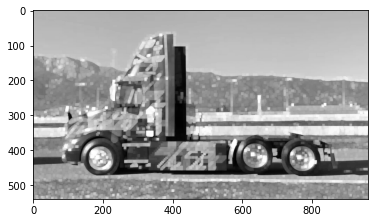

In [582]:
plt.imshow(dilate, cmap = 'gray')

In [585]:
dilate.max()

255

In [ ]:
plt.imshow(img[t])

In [588]:
# If pixel value is greater than a threshold, return true and mark it as green
Image_color_corners = img.copy()
Image_color_corners[corners_dilate > 0.03 * corners_dilate.max() ] = [0, 255, 0]

cv2.imshow('Image with Corners', Image_color_corners)
cv2.waitKey()
cv2.destroyAllWindows()